# Import the Libraries 

In [1]:
import os
import pandas as pd #for Data analysis
import numpy as np  #for math purpose
import matplotlib.pyplot as plt # for visualize
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta,date
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from matplotlib import pyplot
from keras import optimizers
from keras.optimizers import Adam
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from math import * 
from sklearn.metrics import r2_score

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Import the Dataset

In [38]:
#url = 'https://drive.google.com/file/d/1urSCO_dPfMclcyMQuLCiNpxWCNeqyT1I/view?usp=sharing'
#path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#df_germany = pd.read_csv(path)

In [2]:
df_germany = pd.read_csv(r'C:/Users/asifi/Documents/Lab_spatia_data/iteration2/kaggle/input/covid_de.csv')

In [3]:
nordrhein = df_germany.loc[df_germany['state'] == 'Nordrhein-Westfalen']
baden = df_germany.loc[df_germany['state'] == 'Baden-Wuerttemberg']
bayern = df_germany.loc[df_germany['state'] == 'Bayern']
berlin = df_germany.loc[df_germany['state'] == 'Berlin']
brandenburg = df_germany.loc[df_germany['state'] == 'Brandenburg']
bremen = df_germany.loc[df_germany['state'] == 'Bremen']
hamburg = df_germany.loc[df_germany['state'] == 'Hamburg']
hessen = df_germany.loc[df_germany['state'] == 'Hessen']
mecklenburg = df_germany.loc[df_germany['state'] == 'Mecklenburg-Vorpommern']
niedersachsen = df_germany.loc[df_germany['state'] == 'Niedersachsen']
rheinland= df_germany.loc[df_germany['state'] == 'Rheinland-Pfalz']
saarland = df_germany.loc[df_germany['state'] == 'Saarland']
sachsen = df_germany.loc[df_germany['state'] == 'Sachsen']
sachsen_anhalt = df_germany.loc[df_germany['state'] == 'Sachsen-Anhalt']
schleswig = df_germany.loc[df_germany['state'] == 'Schleswig-Holstein']
thueringen = df_germany.loc[df_germany['state'] == 'Thueringen']

# State

In [4]:
total = nordrhein.groupby(['date']).sum().reset_index()

In [5]:
total = total.set_index(pd.DatetimeIndex(total['date']))
total = total.drop(['date'], axis=1)

In [6]:
total['death_rate']=total.apply(lambda x: (x.deaths / x.cases)*100, axis = 1)
total['recovered_rate']=total.apply(lambda x: (x.recovered / x.cases)*100, axis = 1)
total.head(2)

,cases,deaths,recovered,death_rate,recovered_rate
date,,,,,
2020-01-02,3,0,3,0.0,100.0
2020-01-03,5,0,5,0.0,100.0


# Feature Engineering

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaling  = MinMaxScaler()
total[['death_rate','recovered_rate']] = scaling.fit_transform(total[['death_rate','recovered_rate']])

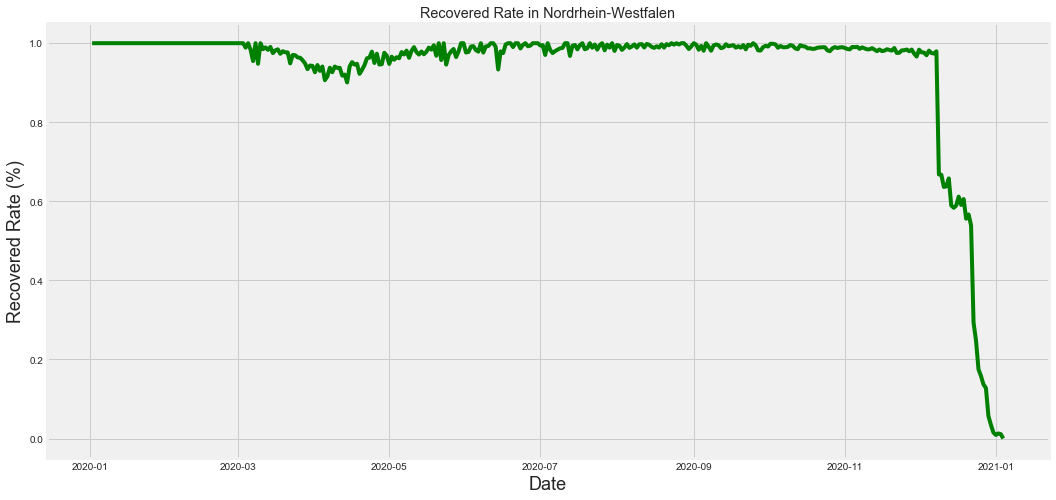

In [9]:
plt.figure(figsize=(16,8))
plt.title('Recovered Rate in Nordrhein-Westfalen')
plt.plot(total['recovered_rate'], color='g')
plt.xlabel("Date", fontsize=18)
plt.ylabel('Recovered Rate (%)', fontsize=18)
plt.savefig('Recovered Rate in Nordrhein-Westfalen.png',dpi=50)
plt.show()

#### Remove Skewness

In [10]:
from scipy.stats import skew
total['death_rate']= np.sqrt(total['death_rate'])
skew(total['death_rate'])

0.2739361928675075

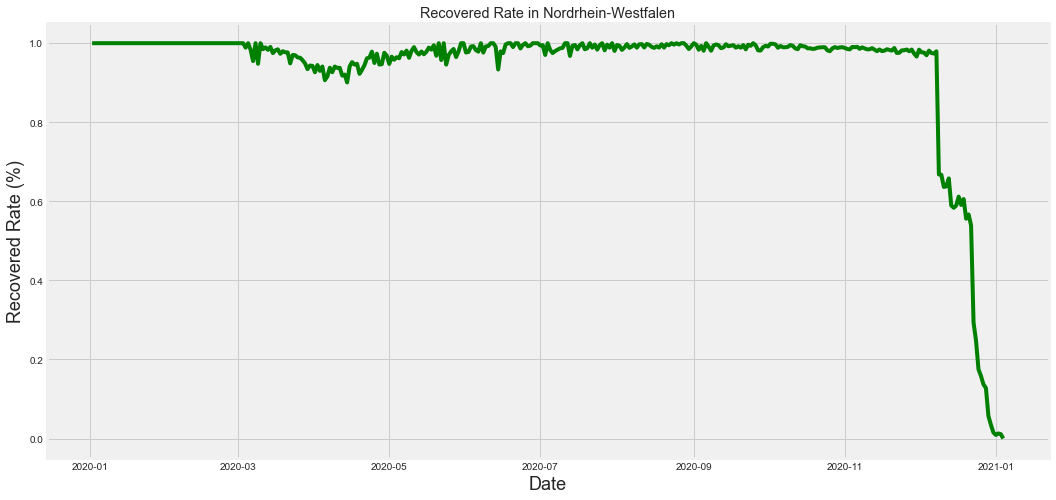

In [11]:
plt.figure(figsize=(16,8))
plt.title('Recovered Rate in Nordrhein-Westfalen')
plt.plot(total['recovered_rate'], color='g')
plt.xlabel("Date", fontsize=18)
plt.ylabel('Recovered Rate (%)', fontsize=18)
plt.savefig('Recovered Rate in Nordrhein-Westfalen.png',dpi=50)
plt.show()

# Model

In [12]:
Data = total.filter(['recovered_rate'])
Data_Set = Data.values

#split the dataset into 75/25 for train and test.
Training_Data = int(np.ceil( len(Data_Set) * .75 ))

#scale the data 
SC = MinMaxScaler(feature_range=(0,1))
SC_Data  = SC.fit_transform(Data_Set)
#scaled_data

In [13]:
Training_Data

243

In [14]:
Train_Data = SC_Data[0:Training_Data  , : ]

#splitting the data
Train_X =[]
Train_Y = []
Test_X = []
Test_Y =  Data_Set[Training_Data : , : ] 


for i in range(30, len(Train_Data)):
    Train_X.append(Train_Data[i-30:i,0])
    Train_Y.append(Train_Data[i,0])

In [15]:
Train_X, Train_Y = np.array(Train_X), np.array(Train_Y)

Train_X = np.reshape(Train_X, (Train_X.shape[0],Train_X.shape[1],1))

In [16]:
Test_Data = SC_Data[Training_Data - 30: , : ]

for i in range(30,len(Test_Data)):
    Test_X.append(Test_Data[i-30:i,0])
    
Test_X = np.array(Test_X)

Test_X = np.reshape(Test_X, (Test_X.shape[0],Test_X.shape[1],1))

In [17]:
model = Sequential()

model.add(LSTM(units = 128, return_sequences = True,  activation='relu',input_shape = (Train_X.shape[1], 1)))
model.add(LSTM(units = 64, return_sequences = True, activation='sigmoid'))
model.add(LSTM(units = 25, return_sequences = True, activation='sigmoid'))
model.add(LSTM(units = 5))
model.add(Dropout(0.2))
model.add(Dense(units = 1))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 64)            49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 25)            9000      
_________________________________________________________________
lstm_3 (LSTM)                (None, 5)                 620       
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 125,594
Trainable params: 125,594
Non-trainable params: 0
__________________________________________________

In [19]:
model.compile(optimizer = optimizers.Adam(lr = 1e-4), metrics=['accuracy'], loss = 'mean_squared_error')

In [20]:
history = model.fit(Train_X, Train_Y, epochs=500, batch_size=5, validation_data=(Test_X, Test_Y))

Epoch 1/500
43/43 [==============================] - 6s 151ms/step - loss: 1.5425 - accuracy: 0.0000e+00 - val_loss: 0.9206 - val_accuracy: 0.0125
Epoch 2/500
43/43 [==============================] - 5s 111ms/step - loss: 0.9537 - accuracy: 0.0000e+00 - val_loss: 0.4964 - val_accuracy: 0.0125
Epoch 3/500
43/43 [==============================] - 5s 117ms/step - loss: 0.4628 - accuracy: 0.0282 - val_loss: 0.2122 - val_accuracy: 0.0125
Epoch 4/500
43/43 [==============================] - 5s 112ms/step - loss: 0.2685 - accuracy: 0.0845 - val_loss: 0.1695 - val_accuracy: 0.0000e+00
Epoch 5/500
43/43 [==============================] - 5s 118ms/step - loss: 0.1993 - accuracy: 0.0986 - val_loss: 0.1413 - val_accuracy: 0.0000e+00
Epoch 6/500
43/43 [==============================] - 5s 116ms/step - loss: 0.1529 - accuracy: 0.1127 - val_loss: 0.1228 - val_accuracy: 0.0000e+00
Epoch 7/500
43/43 [==============================] - 6s 132ms/step - loss: 0.1292 - accuracy: 0.0986 - val_loss: 0.1129 - 

43/43 [==============================] - 5s 126ms/step - loss: 0.0389 - accuracy: 0.1315 - val_loss: 0.1300 - val_accuracy: 0.0000e+00
Epoch 57/500
43/43 [==============================] - 5s 122ms/step - loss: 0.0432 - accuracy: 0.1268 - val_loss: 0.1383 - val_accuracy: 0.0000e+00
Epoch 58/500
43/43 [==============================] - 5s 120ms/step - loss: 0.0380 - accuracy: 0.1362 - val_loss: 0.1340 - val_accuracy: 0.0000e+00
Epoch 59/500
43/43 [==============================] - 5s 123ms/step - loss: 0.0441 - accuracy: 0.1315 - val_loss: 0.1353 - val_accuracy: 0.0000e+00
Epoch 60/500
43/43 [==============================] - 5s 123ms/step - loss: 0.0477 - accuracy: 0.1362 - val_loss: 0.1373 - val_accuracy: 0.0000e+00
Epoch 61/500
43/43 [==============================] - 6s 133ms/step - loss: 0.0398 - accuracy: 0.1315 - val_loss: 0.1310 - val_accuracy: 0.0000e+00
Epoch 62/500
43/43 [==============================] - 5s 128ms/step - loss: 0.0449 - accuracy: 0.1268 - val_loss: 0.1319 - va

43/43 [==============================] - 6s 133ms/step - loss: 0.0325 - accuracy: 0.1268 - val_loss: 0.1414 - val_accuracy: 0.0000e+00
Epoch 112/500
43/43 [==============================] - 5s 128ms/step - loss: 0.0322 - accuracy: 0.1315 - val_loss: 0.1439 - val_accuracy: 0.0000e+00
Epoch 113/500
43/43 [==============================] - 5s 126ms/step - loss: 0.0354 - accuracy: 0.1315 - val_loss: 0.1357 - val_accuracy: 0.0000e+00
Epoch 114/500
43/43 [==============================] - 6s 134ms/step - loss: 0.0303 - accuracy: 0.1362 - val_loss: 0.1348 - val_accuracy: 0.0000e+00
Epoch 115/500
43/43 [==============================] - 6s 135ms/step - loss: 0.0332 - accuracy: 0.1362 - val_loss: 0.1409 - val_accuracy: 0.0000e+00
Epoch 116/500
43/43 [==============================] - 6s 137ms/step - loss: 0.0313 - accuracy: 0.1315 - val_loss: 0.1379 - val_accuracy: 0.0000e+00
Epoch 117/500
43/43 [==============================] - 6s 137ms/step - loss: 0.0302 - accuracy: 0.1362 - val_loss: 0.136

43/43 [==============================] - 6s 147ms/step - loss: 0.0245 - accuracy: 0.1362 - val_loss: 0.1398 - val_accuracy: 0.0000e+00
Epoch 167/500
43/43 [==============================] - 6s 133ms/step - loss: 0.0285 - accuracy: 0.1268 - val_loss: 0.1388 - val_accuracy: 0.0000e+00
Epoch 168/500
43/43 [==============================] - 6s 136ms/step - loss: 0.0243 - accuracy: 0.1362 - val_loss: 0.1426 - val_accuracy: 0.0000e+00
Epoch 169/500
43/43 [==============================] - 6s 146ms/step - loss: 0.0278 - accuracy: 0.1362 - val_loss: 0.1418 - val_accuracy: 0.0000e+00
Epoch 170/500
43/43 [==============================] - 6s 142ms/step - loss: 0.0268 - accuracy: 0.1362 - val_loss: 0.1436 - val_accuracy: 0.0000e+00
Epoch 171/500
43/43 [==============================] - 6s 135ms/step - loss: 0.0230 - accuracy: 0.1362 - val_loss: 0.1413 - val_accuracy: 0.0000e+00
Epoch 172/500
43/43 [==============================] - 6s 137ms/step - loss: 0.0264 - accuracy: 0.1315 - val_loss: 0.138

43/43 [==============================] - 6s 134ms/step - loss: 0.0265 - accuracy: 0.1315 - val_loss: 0.1384 - val_accuracy: 0.0000e+00
Epoch 222/500
43/43 [==============================] - 5s 125ms/step - loss: 0.0162 - accuracy: 0.1362 - val_loss: 0.1472 - val_accuracy: 0.0000e+00
Epoch 223/500
43/43 [==============================] - 6s 129ms/step - loss: 0.0174 - accuracy: 0.1362 - val_loss: 0.1330 - val_accuracy: 0.0000e+00
Epoch 224/500
43/43 [==============================] - 5s 124ms/step - loss: 0.0202 - accuracy: 0.1362 - val_loss: 0.1398 - val_accuracy: 0.0000e+00
Epoch 225/500
43/43 [==============================] - 6s 130ms/step - loss: 0.0210 - accuracy: 0.1362 - val_loss: 0.1382 - val_accuracy: 0.0000e+00
Epoch 226/500
43/43 [==============================] - 5s 127ms/step - loss: 0.0192 - accuracy: 0.1362 - val_loss: 0.1425 - val_accuracy: 0.0000e+00
Epoch 227/500
43/43 [==============================] - 5s 125ms/step - loss: 0.0191 - accuracy: 0.1362 - val_loss: 0.140

43/43 [==============================] - 6s 133ms/step - loss: 0.0146 - accuracy: 0.1362 - val_loss: 0.1429 - val_accuracy: 0.0000e+00
Epoch 277/500
43/43 [==============================] - 6s 134ms/step - loss: 0.0158 - accuracy: 0.1362 - val_loss: 0.1447 - val_accuracy: 0.0000e+00
Epoch 278/500
43/43 [==============================] - 5s 120ms/step - loss: 0.0147 - accuracy: 0.1362 - val_loss: 0.1442 - val_accuracy: 0.0000e+00
Epoch 279/500
43/43 [==============================] - 5s 124ms/step - loss: 0.0143 - accuracy: 0.1362 - val_loss: 0.1377 - val_accuracy: 0.0000e+00
Epoch 280/500
43/43 [==============================] - 5s 125ms/step - loss: 0.0131 - accuracy: 0.1362 - val_loss: 0.1458 - val_accuracy: 0.0000e+00
Epoch 281/500
43/43 [==============================] - 5s 125ms/step - loss: 0.0159 - accuracy: 0.1362 - val_loss: 0.1417 - val_accuracy: 0.0000e+00
Epoch 282/500
43/43 [==============================] - 5s 126ms/step - loss: 0.0141 - accuracy: 0.1362 - val_loss: 0.141

43/43 [==============================] - 5s 126ms/step - loss: 0.0107 - accuracy: 0.1362 - val_loss: 0.1453 - val_accuracy: 0.0000e+00
Epoch 332/500
43/43 [==============================] - 6s 128ms/step - loss: 0.0122 - accuracy: 0.1362 - val_loss: 0.1476 - val_accuracy: 0.0000e+00
Epoch 333/500
43/43 [==============================] - 5s 127ms/step - loss: 0.0123 - accuracy: 0.1362 - val_loss: 0.1462 - val_accuracy: 0.0000e+00
Epoch 334/500
43/43 [==============================] - 6s 133ms/step - loss: 0.0092 - accuracy: 0.1362 - val_loss: 0.1401 - val_accuracy: 0.0000e+00
Epoch 335/500
43/43 [==============================] - 6s 129ms/step - loss: 0.0114 - accuracy: 0.1362 - val_loss: 0.1400 - val_accuracy: 0.0000e+00
Epoch 336/500
43/43 [==============================] - 6s 139ms/step - loss: 0.0085 - accuracy: 0.1362 - val_loss: 0.1454 - val_accuracy: 0.0000e+00
Epoch 337/500
43/43 [==============================] - 6s 128ms/step - loss: 0.0093 - accuracy: 0.1362 - val_loss: 0.142

43/43 [==============================] - 5s 123ms/step - loss: 0.0065 - accuracy: 0.1362 - val_loss: 0.1459 - val_accuracy: 0.0000e+00
Epoch 387/500
43/43 [==============================] - 6s 137ms/step - loss: 0.0066 - accuracy: 0.1362 - val_loss: 0.1437 - val_accuracy: 0.0000e+00
Epoch 388/500
43/43 [==============================] - 6s 129ms/step - loss: 0.0058 - accuracy: 0.1362 - val_loss: 0.1425 - val_accuracy: 0.0000e+00
Epoch 389/500
43/43 [==============================] - 6s 135ms/step - loss: 0.0071 - accuracy: 0.1362 - val_loss: 0.1449 - val_accuracy: 0.0000e+00
Epoch 390/500
43/43 [==============================] - 6s 129ms/step - loss: 0.0067 - accuracy: 0.1362 - val_loss: 0.1450 - val_accuracy: 0.0000e+00
Epoch 391/500
43/43 [==============================] - 6s 129ms/step - loss: 0.0059 - accuracy: 0.1362 - val_loss: 0.1482 - val_accuracy: 0.0000e+00
Epoch 392/500
43/43 [==============================] - 5s 123ms/step - loss: 0.0068 - accuracy: 0.1362 - val_loss: 0.145

43/43 [==============================] - 5s 125ms/step - loss: 0.0044 - accuracy: 0.1362 - val_loss: 0.1457 - val_accuracy: 0.0000e+00
Epoch 442/500
43/43 [==============================] - 5s 124ms/step - loss: 0.0050 - accuracy: 0.1362 - val_loss: 0.1421 - val_accuracy: 0.0000e+00
Epoch 443/500
43/43 [==============================] - 5s 123ms/step - loss: 0.0051 - accuracy: 0.1362 - val_loss: 0.1418 - val_accuracy: 0.0000e+00
Epoch 444/500
43/43 [==============================] - 6s 130ms/step - loss: 0.0047 - accuracy: 0.1362 - val_loss: 0.1440 - val_accuracy: 0.0000e+00
Epoch 445/500
43/43 [==============================] - 6s 129ms/step - loss: 0.0042 - accuracy: 0.1362 - val_loss: 0.1450 - val_accuracy: 0.0000e+00
Epoch 446/500
43/43 [==============================] - 5s 126ms/step - loss: 0.0052 - accuracy: 0.1362 - val_loss: 0.1484 - val_accuracy: 0.0000e+00
Epoch 447/500
43/43 [==============================] - 5s 126ms/step - loss: 0.0044 - accuracy: 0.1362 - val_loss: 0.150

43/43 [==============================] - 6s 143ms/step - loss: 0.0029 - accuracy: 0.1362 - val_loss: 0.1465 - val_accuracy: 0.0000e+00
Epoch 497/500
43/43 [==============================] - 6s 139ms/step - loss: 0.0028 - accuracy: 0.1362 - val_loss: 0.1468 - val_accuracy: 0.0000e+00
Epoch 498/500
43/43 [==============================] - 8s 180ms/step - loss: 0.0026 - accuracy: 0.1362 - val_loss: 0.1513 - val_accuracy: 0.0000e+00
Epoch 499/500
43/43 [==============================] - 7s 158ms/step - loss: 0.0023 - accuracy: 0.1362 - val_loss: 0.1473 - val_accuracy: 0.0000e+00
Epoch 500/500
43/43 [==============================] - 8s 177ms/step - loss: 0.0020 - accuracy: 0.1362 - val_loss: 0.1509 - val_accuracy: 0.0000e+00


In [21]:
predictions = model.predict(Test_X) 
predictions = SC.inverse_transform(predictions)

In [22]:
train = Data[:Training_Data]
validation = Data[Training_Data:]
validation['Predictions'] = predictions

C:\Users\asifi\anaconda3\envs\cmdpython37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


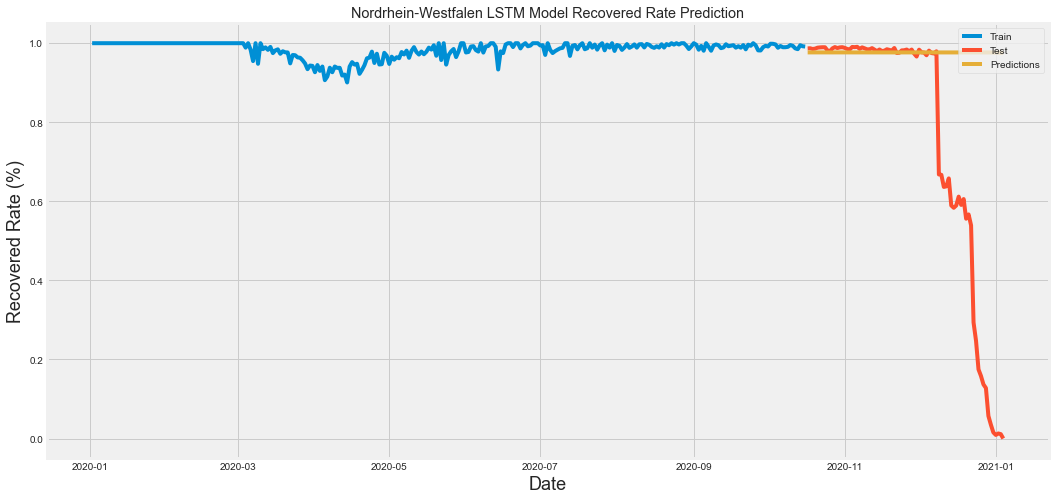

In [24]:
plt.figure(figsize=(16,8))
plt.title('Nordrhein-Westfalen LSTM Model Recovered Rate Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Recovered Rate (%)', fontsize=18)
plt.plot(train['recovered_rate'])
plt.plot(validation[['recovered_rate', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='upper right')
plt.savefig('Nordrhein-Westfalen LSTM Model Recovered Rate Prediction.png',dpi=50)
plt.show()

In [25]:
validation

,recovered_rate,Predictions
date,,
2020-10-17,0.986844,0.976679
2020-10-18,0.987125,0.976675
2020-10-19,0.985355,0.976678
2020-10-20,0.986249,0.976677
2020-10-21,0.988639,0.976680
...,...,...
2020-12-31,0.015440,0.976382
2021-01-01,0.009055,0.976239
2021-01-02,0.012827,0.976052


# Model Evaluation

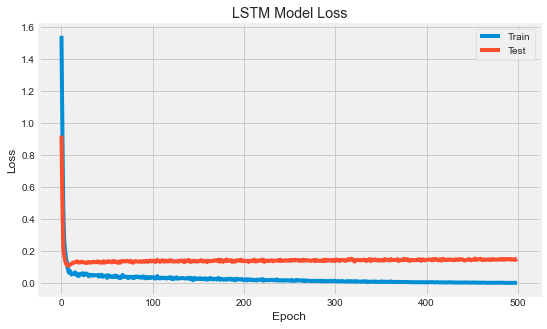

In [26]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.savefig('Nordrhein-Westfalen LSTM Model Loss.png',dpi=100)
plt.show()

In [27]:
Probs_Y = model.predict(Test_X)
Class_Y = model.predict_classes(Test_X)

Probs_Y = Probs_Y[:, 0]
Class_Y = Class_Y[:, 0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


### Mean Squared Error

In [28]:
MSE  = mean_squared_error(Test_Y,Probs_Y)
print('Mean Squared Error: %f' % MSE)

Mean Squared Error: 0.150919


### Root Mean Squared Error

In [29]:
RMSE = sqrt(MSE)
print('Root Mean Squared Error: %f' % RMSE)

Root Mean Squared Error: 0.388483


### Accuracy

In [30]:
accuracy = accuracy_score(Test_Y.round(), Class_Y)
print('Accuracy: %f' % accuracy)

Accuracy: 0.837500


### R^2 score

In [31]:
r = r2_score(Test_Y,Probs_Y)
print('Score: %f' % r)

Score: -0.373925


###  Area Under the Receiver Operating Characteristic Curve Score 

In [32]:
auc = roc_auc_score(Test_Y.round(), Probs_Y)
print('ROC AUC: %f' % auc)

ROC AUC: 0.996556


### Confusion matrix

In [33]:
matrix = confusion_matrix(Test_Y.round(), Class_Y)
print(matrix)

[[ 0 13]
 [ 0 67]]


### Precision

In [34]:
precision = precision_score(Test_Y.round(), Class_Y)
print('Precision: %f' % precision)

Precision: 0.837500


### Recall

In [35]:
recall = recall_score(Test_Y.round(), Class_Y)
print('Recall: %f' % recall)

Recall: 1.000000


### F1 Score

In [36]:
f1 = f1_score(Test_Y.round(), Class_Y)
print('F1 score: %f' % f1)

F1 score: 0.911565
